**Hotel review Sentiment analysis**

In [1]:
import numpy as np
import pandas as pd
from scrapy.selector import Selector
from selenium import webdriver 
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
# URL
url = "https://www.tripadvisor.co.uk"

# Set up ChromeDriver using webdriver-manager
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
# Open the URL
driver.get(url)
# title of the page
title = driver.find_element(By.TAG_NAME, "title").get_attribute('text')
# Print the title of the page
print(f"Page Title: {title}")
# Close the browser
driver.quit()


Page Title: Tripadvisor: Over a billion reviews & contributions for Hotels, Attractions, Restaurants, and more


In [3]:
import urllib.request as req
import pandas as pd
from bs4 import BeautifulSoup

# Define headers
user_agent = 'Chrome/108.0.0.0'
headers = {'User-Agent': user_agent}

# Base URLs for the reviews
base_urls = [
    "https://www.booking.com/reviews/gb/hotel/ibis-edinburgh-centre-st-andrew-square.en-gb.html?aid=357028;label=bin859jc-1DEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AED6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBOACAQ;sid=f12de9e50dc512b87c50bcfe5e61d99b;customer_type=total;hp_nav=0;old_page=0;order=featuredreviews;page=",
    "https://www.booking.com/reviews/gb/hotel/somerfield-lodge.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/ca/hotel/chestnut-university-of-toronto.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/za/hotel/whalesong-guest-house.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/ca/hotel/luxury-inn.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/gb/hotel/grand-hotel-sunderland.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/gb/hotel/central-hoxton-shoreditch-studio-1.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/gb/hotel/innkeeper-s-lodge-aylesbury-south-weston-turville.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/gb/hotel/trivelles-regency-nottingham.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/gb/hotel/the-elizabeth-house.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/gb/hotel/grandburstinfolkestone.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/gb/hotel/ascot-hyde-park.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/gb/hotel/hilton-southampton-southampton.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/gb/hotel/holiday-inn-london-kings-cross-bloomsbury.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/gb/hotel/boulevard.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/gb/hotel/moxy-milton-keynes-milton-keynes2.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/gb/hotel/ibis-coventry-centre.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/gb/hotel/the-bell-inn-horndon-on-the-hill1.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/gb/hotel/rockwell-east.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d",
    "https://www.booking.com/reviews/gb/hotel/windermere-hydro.en-gb.html?aid=357028&label=bin859jc-1FEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AEB6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBeACAQ&sid=71dc851a4b57fd35954db78d3182b35d"
    
]

# Generate URLs for multiple pages (using all the base URLs)
url_l = []
for base_url in base_urls:
    url_l += ["{}{};r_lang=en;rows=75&".format(base_url, page) for page in range(1, 25)]  # Adjust the page range if needed

# Initialize the list to store review data
records = []

# Loop through each URL
for url in url_l:
    print(f"Fetching: {url}")
    try:
        request = req.Request(url, headers=headers)
        response = req.urlopen(request)
        soup = BeautifulSoup(response, 'html.parser')

        # Identify the container for each review.
        # Adjust the tag/class based on the actual HTML structure.
        review_blocks = soup.find_all("li", class_="review_item")
        for review in review_blocks:
            # Extract the individual pieces of data
            content_el = review.find("div", class_="review_item_review_content")
            stay_date_el = review.find("p", class_="review_staydate")
            reviewer_name_el = review.find("p", class_="reviewer_name")
            rating_el = review.find("span", class_="review-score-badge")  # adjust if needed

            # Use conditional expressions to handle missing data
            content = content_el.get_text(strip=True) if content_el else None
            stay_date = stay_date_el.get_text(strip=True) if stay_date_el else None
            reviewer_name = reviewer_name_el.get_text(strip=True) if reviewer_name_el else None
            rating = rating_el.get_text(strip=True) if rating_el else None

            # Append the extracted data to the records list
            records.append({
                'Date': stay_date,
                'Content': content,
                'Reviewer-Name': reviewer_name,
                'Rating': rating
            })
    except req.HTTPError as e:
        print(f"HTTP Error: {e}")
    except req.URLError as e:
        print(f"URL Error: {e}")

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(records)

# Display the first few rows
print(df.head())


Fetching: https://www.booking.com/reviews/gb/hotel/ibis-edinburgh-centre-st-andrew-square.en-gb.html?aid=357028;label=bin859jc-1DEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AED6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBOACAQ;sid=f12de9e50dc512b87c50bcfe5e61d99b;customer_type=total;hp_nav=0;old_page=0;order=featuredreviews;page=1;r_lang=en;rows=75&
Fetching: https://www.booking.com/reviews/gb/hotel/ibis-edinburgh-centre-st-andrew-square.en-gb.html?aid=357028;label=bin859jc-1DEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AED6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBOACAQ;sid=f12de9e50dc512b87c50bcfe5e61d99b;customer_type=total;hp_nav=0;old_page=0;order=featuredreviews;page=2;r_lang=en;rows=75&
Fetching: https://www.booking.com/reviews/gb/hotel/ibis-edinburgh-centre-st-andrew-square.en-gb.html?aid=357028;label=bin859jc-1DEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AED6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmM

In [4]:
print(df.shape)

(11543, 4)


In [5]:
from IPython.display import FileLink
# Save the DataFrame to a CSV file
df.to_csv("booking_reviews.csv", index=False, encoding="utf-8")

FileLink("booking_reviews.csv")

C:\Users\Sara\booking_reviews.csv

In [6]:
# Check if any column contains NaN values
nan_check = df.isna().any()

# Print the result
print(nan_check)


Date             False
Content          False
Reviewer-Name    False
Rating           False
dtype: bool


In [7]:
import pandas as pd
import re
import itertools
import collections
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, WhitespaceTokenizer
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Define punctuation characters to remove
punctuations = """!()-![]{};:,+'"\,<>./?@#$%^&*_~Â"""

# List of month names to remove
months = {"january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"}

# Initialize tokenizer and lemmatizer
w_tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_text(text):
    text = re.sub('[^A-Za-z0-9]+', ' ', text)  # Remove special characters
    text = re.sub(r'\w+:/{2}[\d\w-]+(?:\.[\d\w-]+)*(?:(?:/[^s/]*)*)', '', text)  # Remove URLs
    text = re.sub('\n', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip().lower()

# Function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuations))

# Function to clean and tokenize text while removing stopwords, numbers, and month names
def clean_tokenize(text):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words and word not in months]

# Function to lemmatize text
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(clean_text(text)) if w.isalpha() and w not in stop_words]

# Function to categorize review length
def categorize_review_length(text):
    word_count = len(text.split())
    if word_count < 50:
        return 'short'
    elif word_count < 200:
        return 'medium'
    else:
        return 'long'

# Function to determine sentiment
def sentiment(rating):
    pos = {10, 9}
    neg = {5, 6}
    return 2 if rating in pos else (0 if rating in neg else 1)

# Apply functions to DataFrame
df['Review'] = df['Content'].astype(str).apply(clean_text).apply(remove_punctuation)
df['content_tokens'] = df['Content'].apply(clean_tokenize)
df['review_lemmas'] = df['Content'].apply(lemmatize_text)
df['review_length'] = df['Content'].apply(categorize_review_length)
df['Sentiment'] = df['Rating'].apply(sentiment)

# Flatten token list
token_list = list(itertools.chain.from_iterable(df['content_tokens']))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


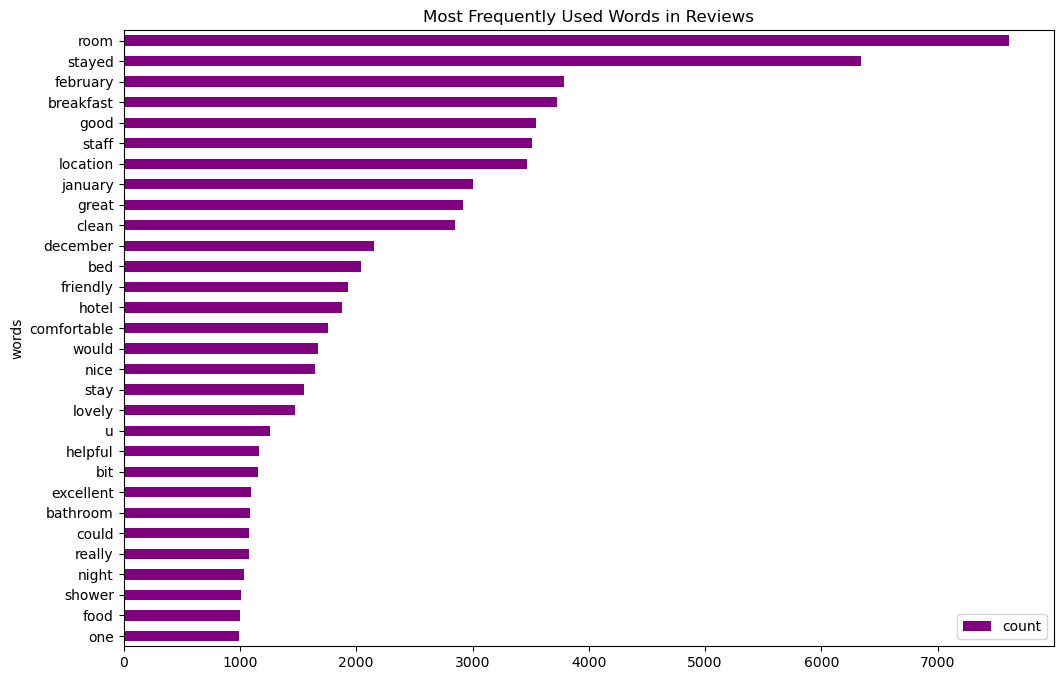

In [8]:
import collections
import matplotlib.pyplot as plt

# Convert 'review_lemmas' column to a list of tokenized words
lemmatized_tokens = list(df['review_lemmas'])

# Flatten list of lists into a single list of tokens
token_list = list(itertools.chain(*lemmatized_tokens))

# Count occurrences of each word
counts_no = collections.Counter(token_list)

# Create a DataFrame with the 30 most common words
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words', 'count'])

# Plot the most frequently used words
fig, ax = plt.subplots(figsize=(12, 8))
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")

# Set title
ax.set_title("Most Frequently Used Words in Reviews")

# Show plot
plt.show()


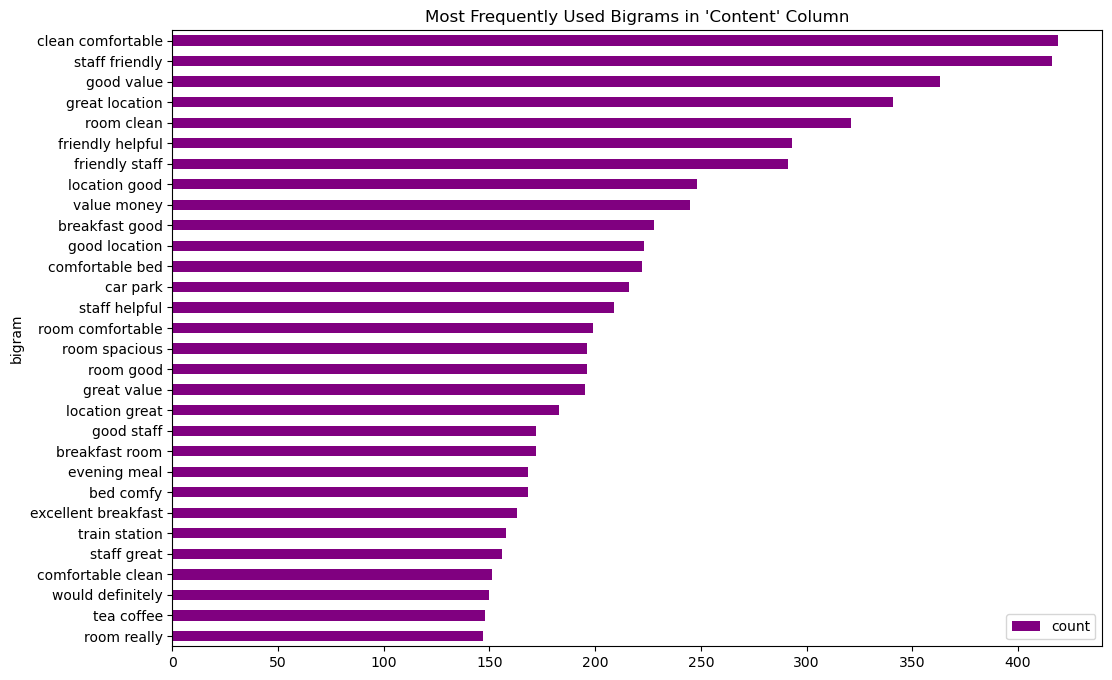

In [9]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize  # Ensure proper tokenization


# Flatten all token lists into a single list
token_list = list(itertools.chain.from_iterable(df['content_tokens']))

# Generate bigrams
bigram_counts = collections.Counter(ngrams(token_list, 2))

# Create a DataFrame with the 30 most common bigrams
clean_reviews = pd.DataFrame(bigram_counts.most_common(30), columns=['bigram', 'count'])

# Convert bigram tuples into readable strings
clean_reviews['bigram'] = clean_reviews['bigram'].apply(lambda x: ' '.join(x))

# Plot the most frequently used bigrams
fig, ax = plt.subplots(figsize=(12, 8))
clean_reviews.sort_values(by='count', ascending=True).plot.barh(x='bigram', y='count', ax=ax, color="purple")

# Set title
ax.set_title("Most Frequently Used Bigrams in 'Content' Column")

# Show plot
plt.show()

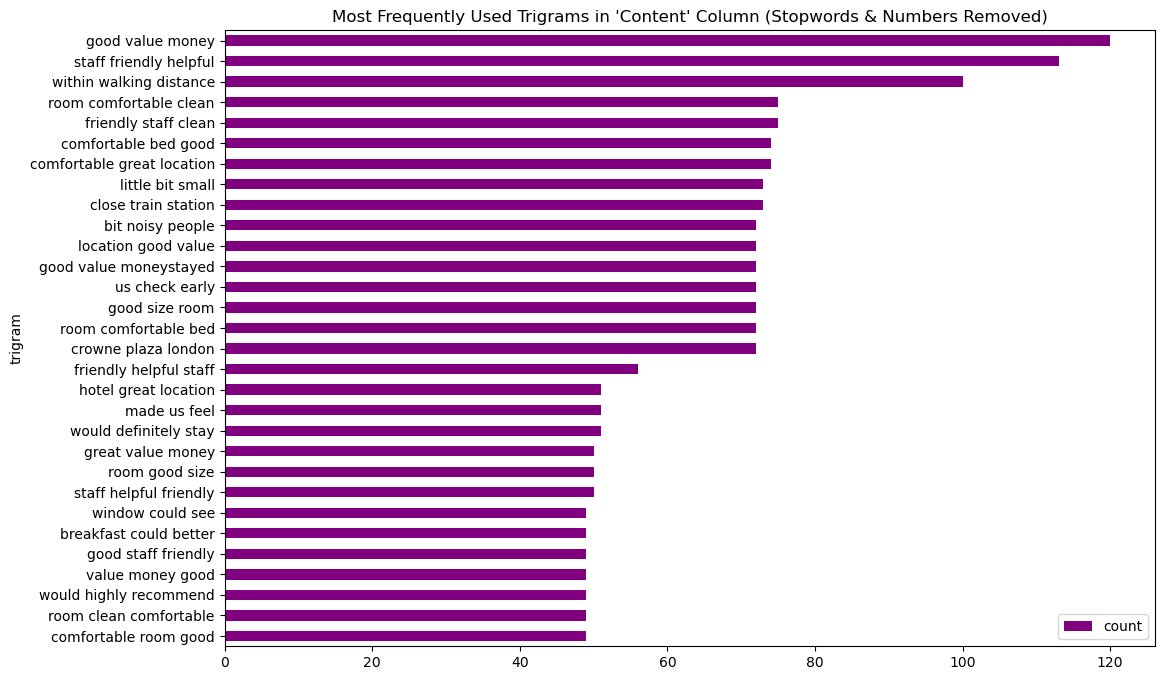

In [10]:
# Generate trigrams
trigram_counts = collections.Counter(ngrams(token_list, 3))

# Create a DataFrame with the 30 most common trigrams
clean_reviews = pd.DataFrame(trigram_counts.most_common(30), columns=['trigram', 'count'])

# Convert trigram tuples into readable strings
clean_reviews['trigram'] = clean_reviews['trigram'].apply(lambda x: ' '.join(x))

# Plot the most frequently used trigrams
fig, ax = plt.subplots(figsize=(12, 8))
clean_reviews.sort_values(by='count', ascending=True).plot.barh(x='trigram', y='count', ax=ax, color="purple")

# Set title
ax.set_title("Most Frequently Used Trigrams in 'Content' Column (Stopwords & Numbers Removed)")

# Show plot
plt.show()

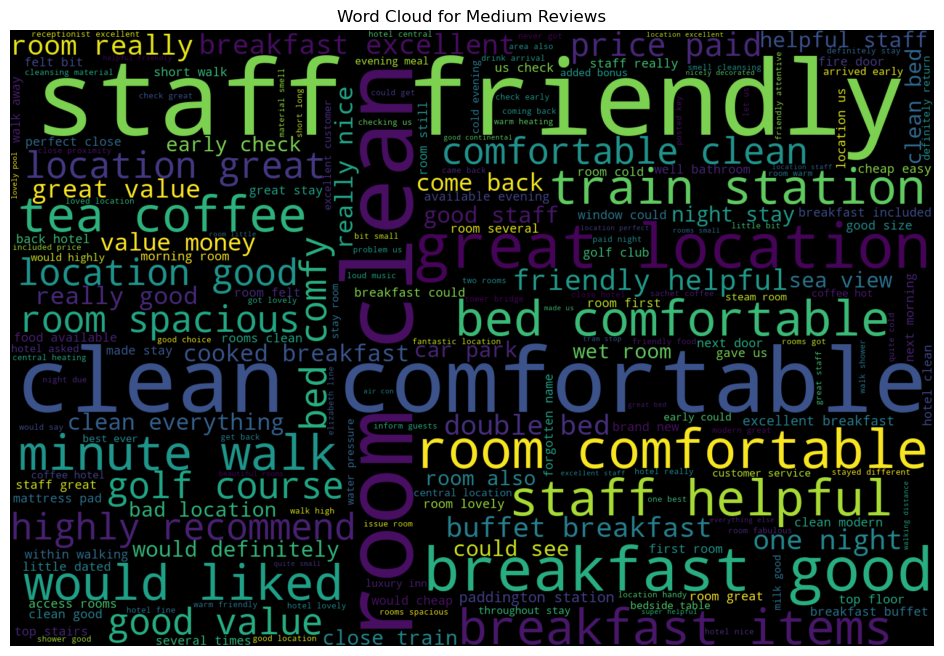

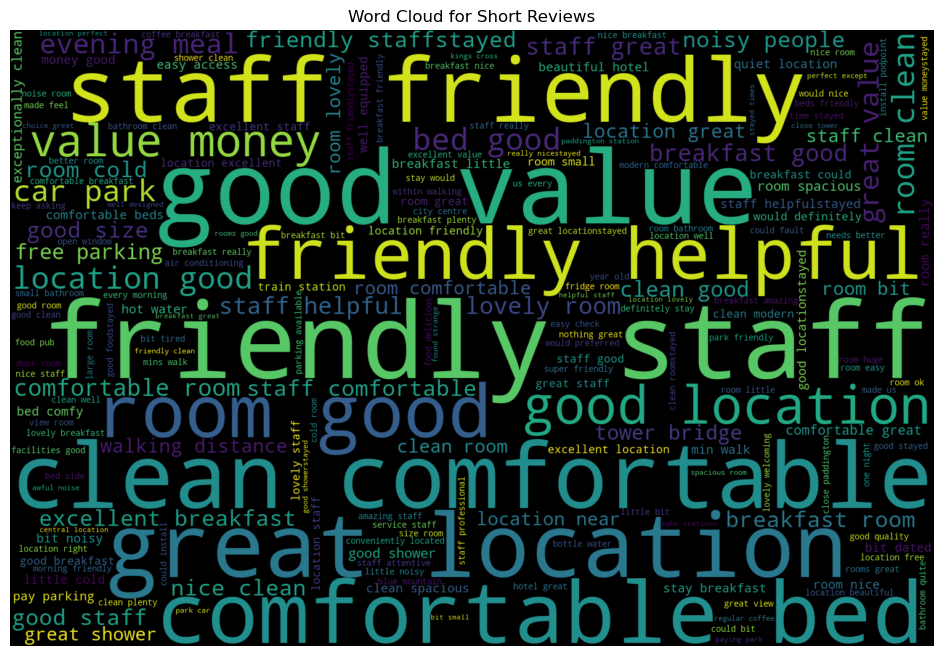

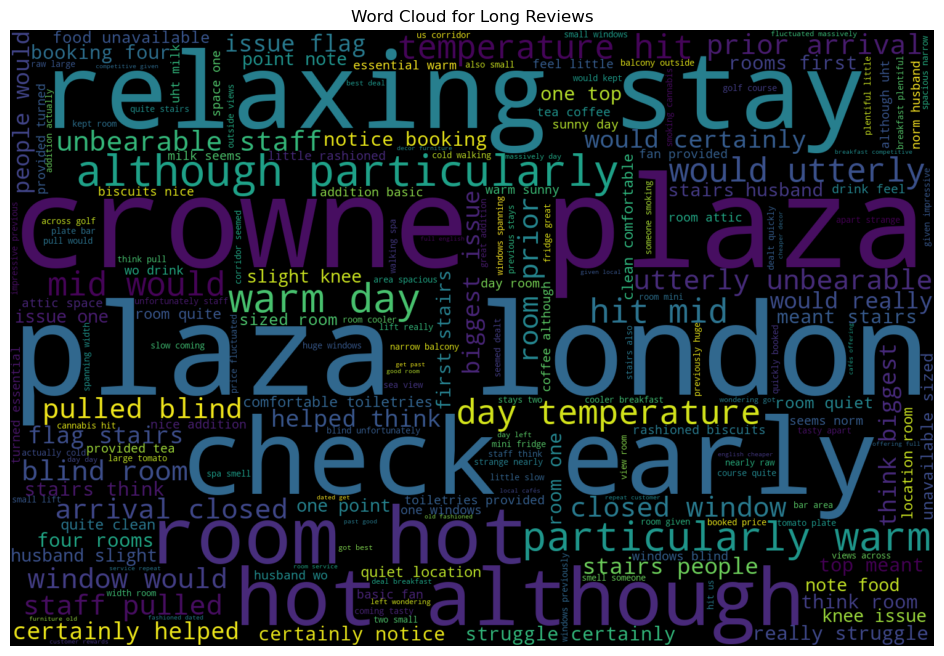

In [11]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Loop through each category ('short', 'medium', 'long')
for length_category in df['review_length'].unique():
    # Filter reviews by the current length category
    curr_lemmatized_tokens = df[df['review_length'] == length_category]['content_tokens']
    
    # Vectorizer setup for bigrams
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bag_of_words = vectorizer.fit_transform(curr_lemmatized_tokens.apply(lambda x: ' '.join(x)))
    
    # Sum word frequencies
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    words_dict = dict(words_freq)
    
    # WordCloud parameters
    WC_height = 1000
    WC_width = 1500
    WC_max_words = 200
    wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
    
    # Generate the word cloud from word frequencies
    wordCloud.generate_from_frequencies(words_dict)
    
    # Plot the word cloud
    plt.figure(figsize=(20, 8))
    plt.imshow(wordCloud, interpolation="bilinear")
    plt.title(f'Word Cloud for {length_category.capitalize()} Reviews')
    plt.axis("off")
    plt.show()

In [12]:
df["Rating"].value_counts()

Rating
8.0    3913
9.0    2732
7.0    2376
10     1850
6.0     432
5.0     240
Name: count, dtype: int64

In [20]:
# Define sentiment categories as sets for faster lookup
pos = {10, 9}
neg = {5, 6}
neu = {7,8}
# Function to determine sentiment
def sentiment(rating):
    rating = float(rating)  # Ensure correct type
    return 2 if rating in pos else (0 if rating in neg else 1)

# Apply function to the 'Rating' column
df['Sentiment'] = df['Rating'].apply(sentiment)
df.head()


,Date,Content,Reviewer-Name,Rating,Review,content_tokens,review_lemmas,review_length,Sentiment
0,Stayed in January 2025,"N/AThank you to Zoltan and Holiday, they rralk...",Pauline,10,n athank you to zoltan and holiday they rralky...,"[zoltan, holiday, rralky, looked, us, stayed, ...","[n, athank, zoltan, holiday, rralky, looked, u...",medium,2
1,Stayed in February 2025,Good central location. Nice breakfast.Stayed i...,Alison,9.0,good central location nice breakfast stayed in...,"[good, central, location, nice]","[good, central, location, nice, breakfast, sta...",short,2
2,Stayed in February 2025,"NothingThe staff, the location, the room, the ...",Theresa,10,nothingthe staff the location the room the dec...,"[nothingthe, staff, location, room, decor, bat...","[nothingthe, staff, location, room, decor, bat...",short,2
3,Stayed in February 2025,There wasn't anything we didn't enjoy.The loca...,Emma,9.0,there wasn t anything we didn t enjoy the loca...,"[anything, location, perfect, room, comfortabl...","[anything, enjoy, location, perfect, room, com...",short,2
4,Stayed in February 2025,Air conditioning was quite clunky and noisy th...,Rachel,8.0,air conditioning was quite clunky and noisy th...,"[air, conditioning, quite, clunky, noisy, thro...","[air, conditioning, quite, clunky, noisy, thro...",short,1


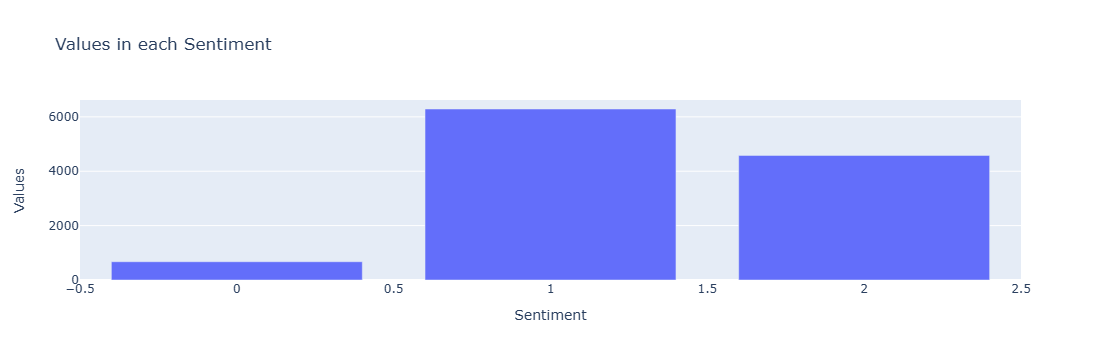

In [22]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=df.Sentiment.value_counts().index, y=df.Sentiment.value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

In [24]:
docs = list(df['Review'])

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_features = 20000) 
 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)

In [26]:
X = tfidf_vectorizer_vectors.toarray()
Y = df['Sentiment']

In [27]:
len(X[0])

3915

In [28]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier

SEED=123

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=SEED, stratify=Y)

In [30]:
print(f"X shape: {X.shape}")  # Check the number of rows in X
print(f"Y shape: {Y.shape}")  # Check the number of rows in Y

X shape: (11543, 3915)
Y shape: (11543,)


In [31]:
dt = DecisionTreeClassifier(random_state=SEED)
dt.fit(X_train,y_train)
y_pred_test = dt.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,dt.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,dt.predict(X_test)),4)))

Training Accuracy score: 1.0
Testing Accuracy score: 0.9757


In [32]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.99      1.00      1.00       134
     neutral       0.97      0.98      0.98      1258
    negative       0.98      0.96      0.97       917

    accuracy                           0.98      2309
   macro avg       0.98      0.98      0.98      2309
weighted avg       0.98      0.98      0.98      2309



In [37]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_test are already defined
cm = confusion_matrix(y_test, y_pred_test)

# Convert confusion matrix into a DataFrame for better readability
cm_matrix = pd.DataFrame(data=cm, 
                         columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                         index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_matrix)


Confusion Matrix:
                  Actual Negative  Actual Neutral  Actual Positive
Predict Negative              134               0                0
Predict Neutral                 1            1237               20
Predict Positive                0              35              882


In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,gnb.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,gnb.predict(X_test)),4)))

Training Accuracy score: 0.9652
Testing Accuracy score: 0.9472


In [39]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.80      1.00      0.89       134
     neutral       0.99      0.93      0.96      1258
    negative       0.92      0.97      0.94       917

    accuracy                           0.95      2309
   macro avg       0.90      0.96      0.93      2309
weighted avg       0.95      0.95      0.95      2309



In [40]:

# Assuming y_test and y_pred_test are already defined
cm = confusion_matrix(y_test, y_pred_test)

# Convert confusion matrix into a DataFrame for better readability
cm_matrix = pd.DataFrame(data=cm, 
                         columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                         index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])

# Report the confusion matrix by printing it
print("Confusion Matrix:")
print(cm_matrix)


Confusion Matrix:
                  Actual Negative  Actual Neutral  Actual Positive
Predict Negative              134               0                0
Predict Neutral                17            1164               77
Predict Positive               16              12              889


In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=SEED).fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,lr.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,lr.predict(X_test)),4)))

Training Accuracy score: 0.9916
Testing Accuracy score: 0.9805


In [42]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       1.00      1.00      1.00       134
     neutral       0.98      0.99      0.98      1258
    negative       0.98      0.97      0.98       917

    accuracy                           0.98      2309
   macro avg       0.99      0.99      0.99      2309
weighted avg       0.98      0.98      0.98      2309



In [43]:

# Assuming y_test and y_pred_test are already defined
cm = confusion_matrix(y_test, y_pred_test)

# Convert the confusion matrix into a DataFrame for better readability
cm_matrix = pd.DataFrame(data=cm, 
                         columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                         index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])

# Report the confusion matrix by printing it
print("Confusion Matrix:")
print(cm_matrix)


Confusion Matrix:
                  Actual Negative  Actual Neutral  Actual Positive
Predict Negative              134               0                0
Predict Neutral                 0            1243               15
Predict Positive                0              30              887


In [44]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,clf.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,clf.predict(X_test)),4)))

Training Accuracy score: 1.0
Testing Accuracy score: 0.9757


In [45]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       1.00      1.00      1.00       134
     neutral       0.97      0.99      0.98      1258
    negative       0.98      0.96      0.97       917

    accuracy                           0.98      2309
   macro avg       0.98      0.98      0.98      2309
weighted avg       0.98      0.98      0.98      2309



In [46]:

# Assuming y_test and y_pred_test are already defined
cm = confusion_matrix(y_test, y_pred_test)

# Convert the confusion matrix into a DataFrame for better readability
cm_matrix = pd.DataFrame(data=cm, 
                         columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                         index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])

# Report the confusion matrix by printing it
print("Confusion Matrix:")
print(cm_matrix)


Confusion Matrix:
                  Actual Negative  Actual Neutral  Actual Positive
Predict Negative              134               0                0
Predict Neutral                 0            1243               15
Predict Positive                0              41              876


In [47]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision Tree', dt),
               ('Logistic Regression', lr),
                ('Naive Bayes', gnb)
              ]
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)

print("Training Accuracy score: "+str(round(accuracy_score(y_train,vc.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,vc.predict(X_test)),4)))

Training Accuracy score: 0.9988
Testing Accuracy score: 0.9814


In [48]:
predictions = pd.Series(lr.predict(X), name="sentiment")
results = pd.concat([predictions],axis=1)
results.to_csv("review-sentiment.csv",index=False)

In [50]:
from gensim.models import Word2Vec
# Train Word2Vec model
model = Word2Vec(sentences=df['Review'], vector_size=100, window=5, min_count=1, workers=4)

# Save the model if you need
model.save("word2vec_model.model")


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Function to get average Word2Vec embeddings for a review
def get_average_embedding(tokens, model):
    embeddings = []
    for word in tokens:
        if word in model.wv:
            embeddings.append(model.wv[word])
    # If no words in the review were found in the model, return a vector of zeros
    if len(embeddings) == 0:
        return np.zeros(model.vector_size)
    # Return the average of the word embeddings
    return np.mean(embeddings, axis=0)

# Convert reviews to embeddings (average word embeddings)
X_embeddings = np.array([get_average_embedding(review, model) for review in df['Review']])

# Labels (ratings)
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=123, stratify=y)

# Check shapes
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (9234, 100)
Testing data shape: (2309, 100)


In [52]:
# Train a Random Forest Classifier (you can use other classifiers like Logistic Regression, SVM, etc.)
model_classifier = RandomForestClassifier(n_estimators=100, random_state=123)
model_classifier.fit(X_train, y_train)

# Make predictions
y_pred = model_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

          10       0.95      0.92      0.94       370
         5.0       1.00      1.00      1.00        48
         6.0       1.00      1.00      1.00        86
         7.0       0.99      1.00      1.00       475
         8.0       0.96      0.98      0.97       783
         9.0       0.97      0.96      0.96       547

    accuracy                           0.97      2309
   macro avg       0.98      0.98      0.98      2309
weighted avg       0.97      0.97      0.97      2309

